# 10.7 Simulations of Galaxy Clusters with the X-IFU

This section contains a tutorial focused on the simulation of observations of Galaxy Clusters with the Athena
X-IFU. Even though we chose a specific type of sources, the simulation approach can be generalized to
any extended source featuring significant spectral variation across the field of view. All files necessary to
run the following simulations are available for download at http://www.sternwarte.uni-erlangen.de/~sixte/downloads/X-IFU_clusters_tutorial.tgz


In [1]:
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import time
import tempfile
import astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
from astropy.visualization import simple_norm
from datetime import datetime
from funcs import run_comm
from subprocess import check_call, STDOUT
from xspec import Xset, Plot, AllData, ModelManager, Spectrum, Model, AllModels, Fit

plt.style.use(astropy_mpl_style)


In [2]:
tmpDir = tempfile.mkdtemp()
os.environ["PFILES"] = tmpDir + ":" + os.environ["PFILES"]
os.environ["HEADASNOQUERY"] = ""
os.environ["HEADASPROMPT"] = "/dev/null/"
SIXTE = os.environ["SIXTE"]
xmldir = f"{SIXTE}/share/sixte/instruments/athena-xifu/baseline"
xml = f"{xmldir}/xifu_nofilt_infoc.xml"


## 10.7.1 SIMPUT file for 3D data

The main difficulty of simulating a galaxy cluster observation lies in the building of a suitable SIMPUT file
containing all the information probed by a high-resolution integrated field unit like the X-IFU. To illustrate
this, let us first take a simple point source defined by an XSPEC spectrum with significant line emission
(*xifu_point_source.xcm file*):

### Simput file for xifu_point_source.xcm (download needed) with `simputfile`

In [3]:
xcm = 'xifu_point_source.xcm'
sim_file = 'xifu_point_source.simput'

RA=239.064583333
Dec=66.3470277776
srcFlux=2e-12
Emin = 0.1
Emax = 10.

comm = (f'simputfile Simput={sim_file} RA={RA} Dec={Dec} srcFlux={srcFlux} Emin={Emin} Emax={Emax} ' + 
        f'XSPECFile={xcm} clobber=yes')
#print(comm)
run_comm(comm, 'Creating simput file for point source')

Creating simput file for point source
simputfile Simput=xifu_point_source.simput RA=239.064583333 Dec=66.3470277776 srcFlux=2e-12 Emin=0.1 Emax=10.0 XSPECFile=xifu_point_source.xcm clobber=yes
finished successfully!


		XSPEC version: 12.14.1
	Build Date/Time: Sun Oct 13 18:44:41 2024


!XSPEC12>model  phabs*apec  ;              0.03    -0.001          0          0     100000      1e+06  ;               1.5      0.01      0.008      0.008         64         64  ;              0.75     0.001          0          0          5          5  ;                0      -0.01     -0.999     -0.999         10         10  ;                1       0.01          0          0      1e+20      1e+24
Reading APEC data from 3.0.9


Model phabs<1>*apec<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    3.00000E-02  frozen
   2    2   apec       kT         keV      1.50000      +/-  0.0          
   3    2   apec       Abundanc

### Running simulation with `sixtesim`

In [4]:
evt_file = 'xifu_point_source_evt.fits'
comm = (f'sixtesim XMLFile={xml} RA={RA} Dec={Dec} ' + 
        f'EvtFile={evt_file} Simput={sim_file} Exposure=100000 clobber=yes') # 10 ks of simulation
#print(comm)
run_comm(comm,'Simulating simput file for point source')

Simulating simput file for point source
sixtesim XMLFile=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/xifu_nofilt_infoc.xml RA=239.064583333 Dec=66.3470277776 EvtFile=xifu_point_source_evt.fits Simput=xifu_point_source.simput Exposure=100000 clobber=yes
initialize ...
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
Seed = 1639954553
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
try to load all spectra ('xifu_point_source.simput[SPECTRUM,1]') into cache ...
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key

### Create spectrum with `makespec`

In [5]:
spec_file = 'xifu_point_source_spec.pha'
comm = (f"makespec EvtFile={evt_file} Spectrum={spec_file}  EventFilter='GRADING==1' clobber=yes RSPPath={xmldir}") 
#print(comm)
run_comm(comm,'Generating spectrum')

Generating spectrum
makespec EvtFile=xifu_point_source_evt.fits Spectrum=xifu_point_source_spec.pha  EventFilter='GRADING==1' clobber=yes RSPPath=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline
SIXTE version 3.0.4
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
Seed = 1682718412
calculate spectrum ...
store spectrum ...
ARF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf
RMF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf




1 spectrum  in use
 
Spectral Data File: xifu_point_source_spec.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.139e+00 +/- 7.169e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-19362
  Telescope: Athena Instrument: XIFU  Channel Type: PI
  Exposure Time: 1e+05 sec
 Using fit statistic: chi
 Using Response (RMF) File            /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf


Model phabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshif

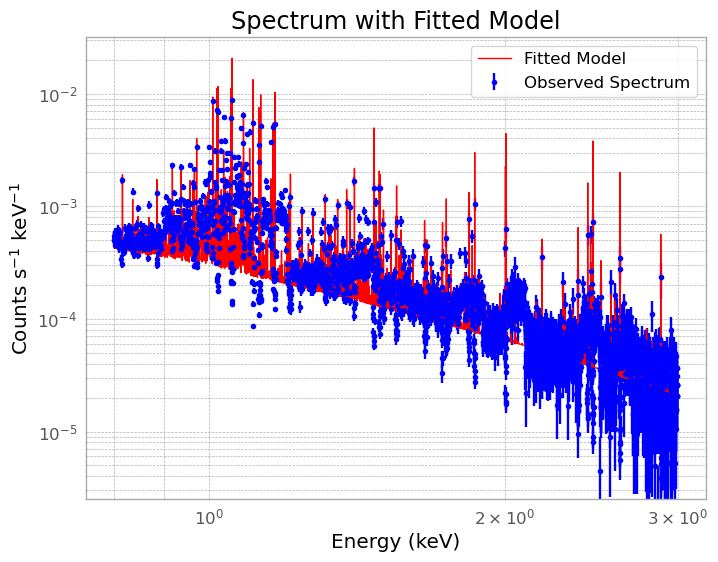

In [6]:
Plot.device = '/null'
AllData.clear()
AllModels.clear()
s1 = Spectrum(spec_file)
m0 = Model("phabs*apec")
Xset.abund = "wilm"
Xset.cosmo = "70 0. 0.73"
Xset.xsect = "bcmc"
m0.phabs.nH = 0.2
m0.apec.kT = 1.5
m0.apec.Abundanc = 0.75
s1.ignore('**-0.8')
s1.ignore('3.0-**')
Fit.perform()

Plot.xAxis="keV"
Plot("ufs","delchi")
Plot.device = "/null" 

energies = Plot.x()      
counts = Plot.y()            
errors = Plot.yErr()       
model_counts = Plot.model()   

plt.errorbar(energies, counts, yerr=errors, fmt='o', label="Observed Spectrum", color='blue', markersize=3)
plt.plot(energies, model_counts, label="Fitted Model", color='red', linewidth=1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts s$^{-1}$ keV$^{-1}$")
plt.title("Spectrum with Fitted Model")
plt.legend()
plt.grid(True, which="both", linestyle="--", lw=0.5)
plt.show()
Plot.device = '/null'
AllData.clear()
AllModels.clear()

If one then analyzes the output spectrum of an X-IFU simulation performed with this SIMPUT file (see
Sect. 10.7.2 for the simulation run and the `makespec` tool presented in Sect. 10.2 for the spectrum building), one
will notice that significant artifacts are present near the emission lines. This is actually due to the
default discretization of the spectra in the SIMPUT file being too raw, resulting in poorly defined lines. While
it is suitable for most simulations, high resolution instruments like the X-IFU will reveal these artifacts. It is
therefore necessary to correct this by using a finer sampling by adding `Estep=0.00025` to the simputfile call.
This seems like a simple enough fix, but the resulting SIMPUT file will be ∼ 2 Mbytes large while the previous
one was only ∼ 100 kbytes. If we extend this to at least one source per X-IFU pixel, one quickly realizes that the
simulation can no longer be run on a standard computer.

In this section, we will thus present two different approaches to solve this issue: the first one will concentrate
on the use of existing 2D spectral parameters maps obtained by other instruments to compare with the future
X-IFU capability; the second one will present a general tool to interface SIXTE with galaxy cluster simulations.
On top of those two solutions, the SIMPUT format (see SIMPUT manual) allows the definition of a source
through a perfect list of photons (i.e. before being folded through any instrumental response). This approach
should be chosen for the simulation of faint sources with high spatial variability for which too many different
spectral shapes would need to be saved in the SIMPUT catalog while only a limited number of photons would
be detected during a single observation.

## Using existing 2D maps

Use the results obtained by Russell et al. (2012) with Chandra on the galaxy cluster **Abell 2146** for which they could derive temperature and abundance maps. The brute force approach would be to define a SIMPUT catalog containing one source per input image pixel. If this would be suitable for parameters randomly distributed across the images, astrophysical sources typically feature strong correlations between physical quantities. To take advantage of this property and reduce the amount of sources and spectra in the catalog, the `simputmultispec` tool was developed. It takes as input a series of parameter maps and will create a SIMPUT catalog containing extended sources corresponding to regions with similar parameters according to a given binning.


### Take a Look at the 2D Maps

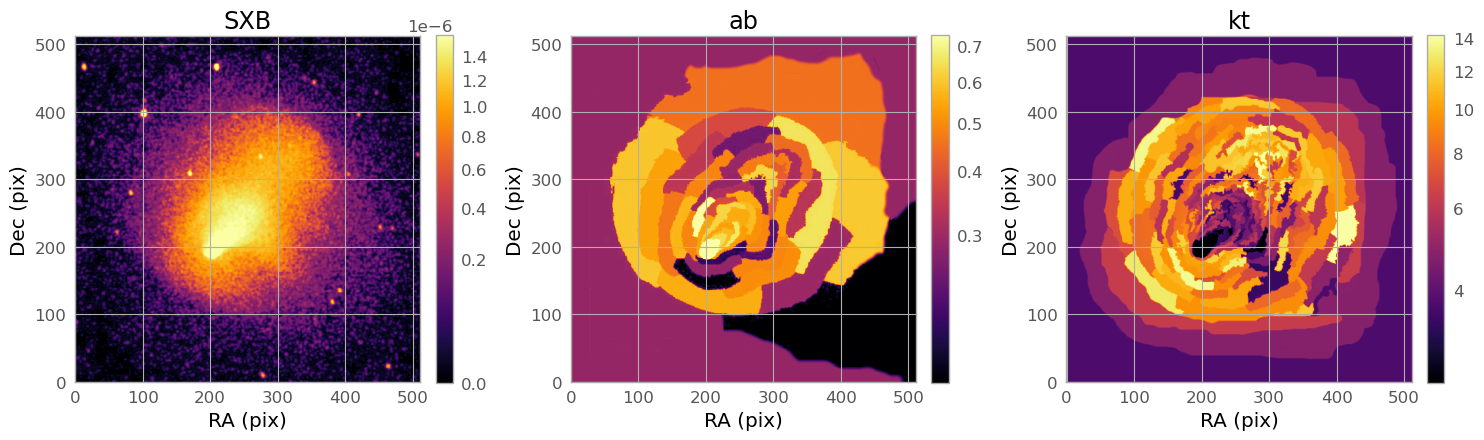

In [7]:
twod_maps = ["A2146_SXB_russel_coord_cal.fits", 
              "A2146_ab_russel_coord_cal.fits", 
              "A2146_kt_russel_coord_cal.fits"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, file in enumerate(twod_maps):
    # Abrir el archivo FITS
    with fits.open(file) as hdul:
        image_data = hdul[0].data
        norm = simple_norm(image_data, 'sqrt', percent=99)
    
        ax = axes[i]
        im = ax.imshow(image_data, origin='lower', cmap='inferno', norm=norm) 
        ax.set_title(file.split('_')[1])  
        ax.set_xlabel("RA (pix)")
        ax.set_ylabel("Dec (pix)")
        plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


### Use the `simputmultispec` tool to create SIMPUT file from the 2D absorption and kt parameter maps, as well as the image file containing the flux distribution.

The tool simputmultispec generates a SIMPUT catalogue for an extended source. The spectral shape of the
extended source can be described by an arbitrarily complex spectral model that is defined in an ISIS or XSPEC
parameter file. The variation of certain model parameters is defined through FITS images which contain the
model parameter as a function of position on the sky. The total flux at each position is defined by an additional
image file. simputmultispec bins the parameter combinations occuring in the image onto a grid, generates
spectra and images for each of these parameter combinations, and generates a SIMPUT file. 

In [8]:
xcm = 'xifu_point_source.xcm'
sim_file = 'clusterA2146.simput'
img_file = "A2146_SXB_russel_coord_cal.fits"
param_files = "'A2146_kt_russel_coord_cal.fits;A2146_ab_russel_coord_cal.fits'"

RA=239.064583333
Dec=66.3470277776
srcFlux=7.995076796356145e-12
Emin = 0.5
Emax = 10.0
Elow = 0.2
Eup = 12.
comm = (f'simputmultispec Simput={sim_file} XSPECFile={xcm} ImageFile={img_file} ParamFiles={param_files} ' + 
        f'ParamNames="2;3" ParamsLogScale="yes;no" ParamsNumValues="8;8" Emin={Emin} Emax={Emax} RA={RA} Dec={Dec} ' +
        f'srcFlux={srcFlux} Elow={Elow} Eup={Eup} Estep=0.00025 clobber=yes')
#print(comm)
run_comm(comm,'Creating simput file for point source')

Creating simput file for point source
simputmultispec Simput=clusterA2146.simput XSPECFile=xifu_point_source.xcm ImageFile=A2146_SXB_russel_coord_cal.fits ParamFiles='A2146_kt_russel_coord_cal.fits;A2146_ab_russel_coord_cal.fits' ParamNames="2;3" ParamsLogScale="yes;no" ParamsNumValues="8;8" Emin=0.5 Emax=10.0 RA=239.064583333 Dec=66.3470277776 srcFlux=7.995076796356145e-12 Elow=0.2 Eup=12.0 Estep=0.00025 clobber=yes

		XSPEC version: 12.14.1
	Build Date/Time: Sun Oct 13 18:44:41 2024


!XSPEC12>model  phabs*apec  ;              0.03    -0.001          0          0     100000      1e+06  ;               1.5      0.01      0.008      0.008         64         64  ;              0.75     0.001          0          0          5          5  ;                0      -0.01     -0.999     -0.999         10         10  ;                1       0.01          0          0      1e+20      1e+24
Reading APEC data from 3.0.9


Model phabs<1>*apec<2> Source No.: 1   Active/Off
Model Model Component  Pa

### Running simulation with `sixtesim`

In [9]:
evt_file = '2d_maps_evt.fits'
comm = (f'sixtesim XMLFile={xml} RA={RA} Dec={Dec} ' +
        f'EvtFile={evt_file} Simput={sim_file} Exposure=100000 clobber=yes')
#print(comm)
run_comm(comm,'Simulating simput file')

Simulating simput file
sixtesim XMLFile=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/xifu_nofilt_infoc.xml RA=239.064583333 Dec=66.3470277776 EvtFile=2d_maps_evt.fits Simput=clusterA2146.simput Exposure=100000 clobber=yes
initialize ...
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
Seed = 1750580059
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
try to load all spectra ('clusterA2146.simput[SPECTRUM,1]') into cache ...
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - settin

### Modify the EVT file to use later (DS9-type) regions to extract spectra with `radec2xy`

In [10]:
comm = (f'radec2xy EvtFile={evt_file} refRA={RA} refDec={Dec} Projection=AIT')
#print(comm)
run_comm(comm,f'Adding X,Y coordinates to {evt_file} file')

Adding X,Y coordinates to 2d_maps_evt.fits file
radec2xy EvtFile=2d_maps_evt.fits refRA=239.064583333 refDec=66.3470277776 Projection=AIT
initialization ...
open event file '2d_maps_evt.fits' ...
Given file is not a standard Event File, trying to read it as TES Event File...
open TES event file '2d_maps_evt.fits' ...
add XY coordinates to event file ...
 ... adding X, Y coordinates successful!
cleaning up ...
finished successfully!



### Create region files (central and outer) 

In [11]:
src_radius = 10. # arcsec radius
core_reg = (239.0655,66.347052,src_radius) # deg
outskirts_reg = (239.03272,66.364708,src_radius) #deg

with open('core.reg', 'w') as f:
    f.write(f'fk5\n')
    f.write(f'circle({core_reg[0]},{core_reg[1]}, {core_reg[2]}") # text={{Core}}\n')

with open('outskirts.reg', 'w') as f:
    f.write(f'fk5\n')
    f.write(f'circle({outskirts_reg[0]},{outskirts_reg[1]},{outskirts_reg[2]}") # text={{outskirts}}\n')
    

### Create the image with `imgev`

In [12]:
img_file = '2d_maps_img.fits'
comm = (f'imgev EvtFile={evt_file} Image={img_file} CoordinateSystem=0 Projection=TAN CUNIT1=deg CUNIT2=deg ' + 
        f'NAXIS1=80 NAXIS2=80 CRVAL1={RA} CRVAL2={Dec} CDELT1=-0.0011888874248538006 CDELT2=0.0011888874248538006 ' +
        f'CRPIX1=40.5 CRPIX2=40.5 clobber=yes')
#print(comm)
run_comm(comm, "Creating image")

Creating image
imgev EvtFile=2d_maps_evt.fits Image=2d_maps_img.fits CoordinateSystem=0 Projection=TAN CUNIT1=deg CUNIT2=deg NAXIS1=80 NAXIS2=80 CRVAL1=239.064583333 CRVAL2=66.3470277776 CDELT1=-0.0011888874248538006 CDELT2=0.0011888874248538006 CRPIX1=40.5 CRPIX2=40.5 clobber=yes
initialize ...
open event file '2d_maps_evt.fits' ...
Given file is not a standard Event File, trying to read it as TES Event File...
open TES event file '2d_maps_evt.fits' ...
finished successfully!



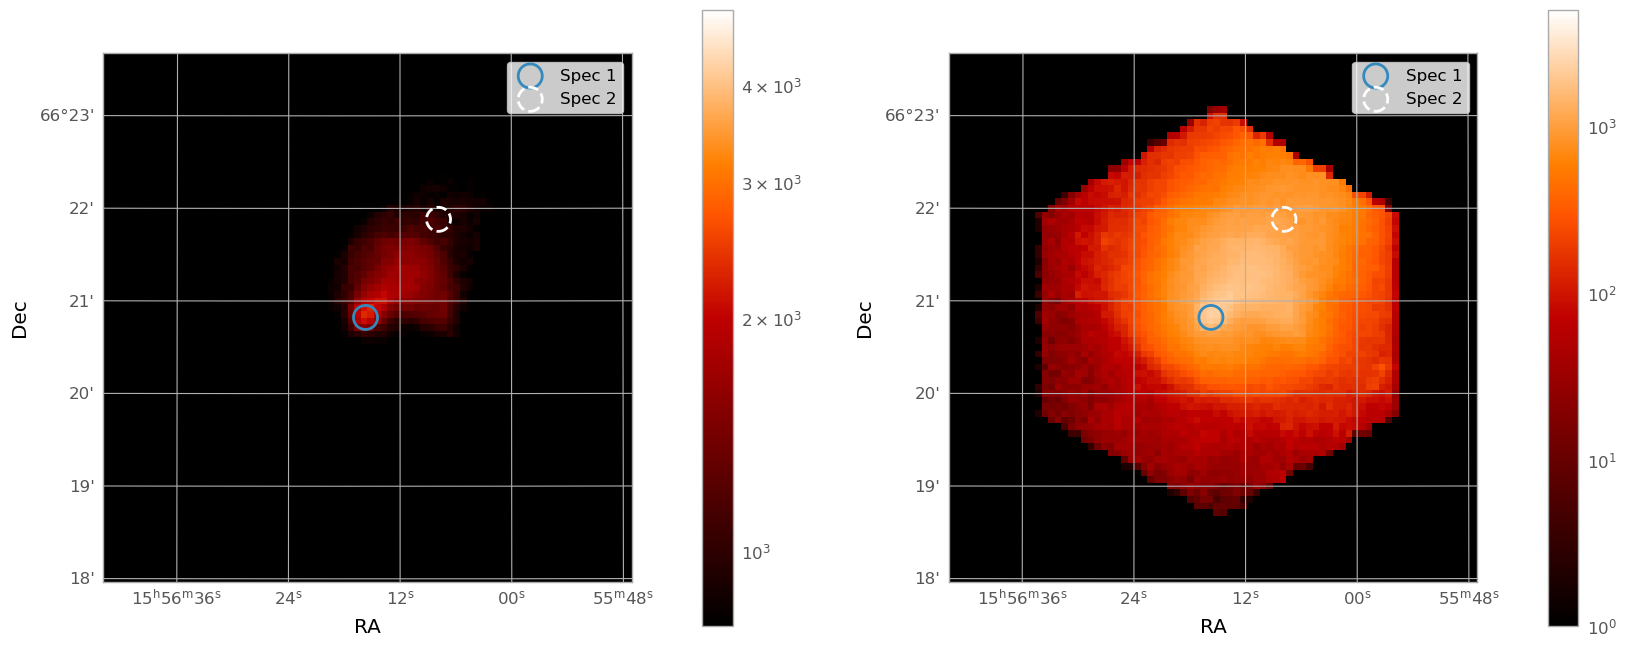

In [13]:
image_data = fits.getdata(img_file, ext=0)
hdu = fits.open(img_file)[0]
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(20,8))

#plot images (left: minimum cut in counts=800; better contrast)
ax = fig.add_subplot(1, 2, 1, projection=wcs)
ax.scatter(core_reg[0], core_reg[1], transform=ax.get_transform('fk5'), s=300,
           edgecolor='C0', facecolor='none', linewidth=2,label='Spec 1')
ax.scatter(outskirts_reg[0], outskirts_reg[1], transform=ax.get_transform('fk5'), s=300,
           edgecolor='white', facecolor='none', linestyle='--',linewidth=2,label='Spec 2')
ax.legend()
cmap = plt.cm.gist_heat
im = ax.imshow(image_data, cmap=cmap, norm=colors.LogNorm(vmin=800, vmax=5000, clip=True), origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
fig.colorbar(im,ax=ax, pad=0.1)

#plot images (right: minimum cut in counts=1 to see the hexagon)
ax = fig.add_subplot(1, 2, 2, projection=wcs)
ax.scatter(core_reg[0], core_reg[1], transform=ax.get_transform('fk5'), s=300,
           edgecolor='C0', facecolor='none', linewidth=2,label='Spec 1')
ax.scatter(outskirts_reg[0], outskirts_reg[1], transform=ax.get_transform('fk5'), s=300,
           edgecolor='white', facecolor='none', linestyle='--',linewidth=2,label='Spec 2')
ax.legend()
cmap = plt.cm.gist_heat
im = ax.imshow(image_data, cmap=cmap, norm=colors.LogNorm(vmin=1, vmax=5000, clip=True), origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
fig.colorbar(im,ax=ax, pad=0.1)


### Create spectrum center with `makespec`

In [14]:
spec_file = 'xifu_center_spec.pha'
comm = (f"makespec EvtFile={evt_file} Spectrum={spec_file} RSPPath={xmldir} EventFilter='regfilter(\"core.reg\")'")
print(comm)
run_comm(comm, 'Generating central spectrum')

makespec EvtFile=2d_maps_evt.fits Spectrum=xifu_center_spec.pha RSPPath=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline EventFilter='regfilter("core.reg")'
Generating central spectrum
makespec EvtFile=2d_maps_evt.fits Spectrum=xifu_center_spec.pha RSPPath=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline EventFilter='regfilter("core.reg")'
SIXTE version 3.0.4
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
Seed = 1837028880
calculate spectrum ...
store spectrum ...
 Table Extension SPECTRUM with version 1 already exists  returning token for existing version 
ARF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf
RMF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf



### Rebin spectral data with `grppha`

In [15]:
binspec = "xifu_center_spec_rebin.pha"
comm = (f"grppha infile={spec_file} outfile={binspec} clobber=yes comm='group min 20 & exit'")
run_comm(comm, "Rebinning spectrum")

Rebinning spectrum
grppha infile=xifu_center_spec.pha outfile=xifu_center_spec_rebin.pha clobber=yes comm='group min 20 & exit'
 
  -------------------------
  MANDATORY KEYWORDS/VALUES
  -------------------------
  --------------------------------------------------------------------
  --------------------------------------------------------------------
  EXTNAME   - SPECTRUM        Name of this BINTABLE
  TELESCOP  - Athena          Mission/Satellite name
  INSTRUME  - XIFU            Instrument/Detector
  FILTER    - NONE            Instrument filter in use
  EXPOSURE  - 1.00000E+05     Integration time (in secs) of PHA data
  AREASCAL  - 1.0000          Area scaling factor
  BACKSCAL  - 1.0000          Background scaling factor
  BACKFILE  - NONE            Associated background file
  CORRSCAL  - 0.0000          Correlation scaling factor
  CORRFILE  - NONE            Associated correlation file
  RESPFILE  - /Users/jessicaplanelles/simput/share/sixte/instruments...
  ANCRFILE  - /


1 spectrum  in use
 
Spectral Data File: xifu_center_spec_rebin.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.053e-01 +/- 1.747e-03
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-2649
  Telescope: Athena Instrument: XIFU  Channel Type: PI
  Exposure Time: 1e+05 sec
 Using fit statistic: chi
 Using Response (RMF) File            /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf

   146 channels (1-146) ignored in spectrum #     1

  1444 channels (1206-2649) ignored in spectrum #     1


ignore:  1440 channels ignored from  source number 1


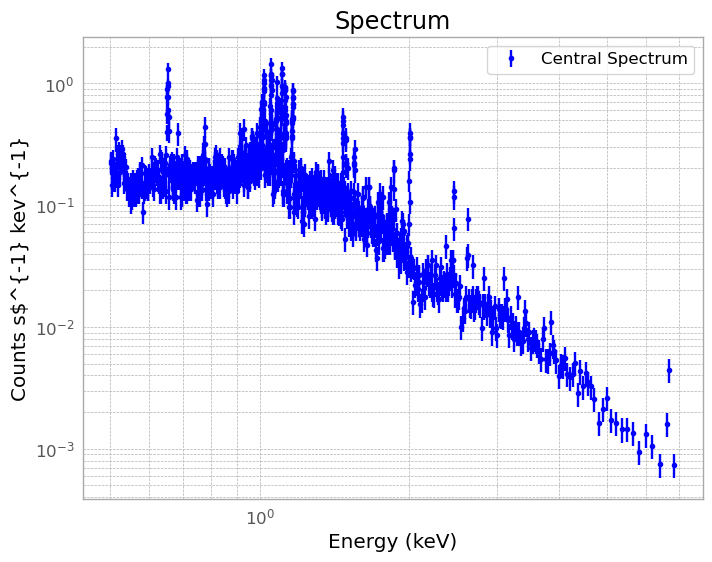

In [16]:
# Plot central spectrum
Plot.device = '/null'
AllData.clear()
AllModels.clear()

#Plot.device = "/xs"
Plot.xAxis="keV"

AllData.clear()
s1 = Spectrum(binspec)
s1.ignore("**-0.5")
s1.ignore("7.0-**")
Plot.xAxis="keV"
AllData.ignore("bad")
Plot("ldata")
Plot.device = '/null'
energies = Plot.x()      
counts = Plot.y()            
errors = Plot.yErr()       
plt.errorbar(energies, counts, yerr=errors, fmt='o', label="Central Spectrum", color='blue', markersize=3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts s$^{-1} kev^{-1}")
plt.title("Spectrum")
plt.legend()
plt.grid(True, which="both", linestyle="--", lw=0.5)
plt.show()

### Create spectrum outside with `makespec`

In [17]:
spec_file = 'xifu_outside_spec.pha'
comm = (f"makespec EvtFile={evt_file} Spectrum={spec_file} RSPPath={xmldir} EventFilter='regfilter(\"outskirts.reg\")'")
#print(comm)
run_comm(comm,'Generating spectrum')

Generating spectrum
makespec EvtFile=2d_maps_evt.fits Spectrum=xifu_outside_spec.pha RSPPath=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline EventFilter='regfilter("outskirts.reg")'
SIXTE version 3.0.4
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
Seed = 1839246408
calculate spectrum ...
store spectrum ...
 Table Extension SPECTRUM with version 1 already exists  returning token for existing version 
ARF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf
RMF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf



### Rebin spectral data with `grppha`

In [18]:
binspec = "xifu_outside_spec_rebin.pha"
comm = (f"grppha infile={spec_file} outfile={binspec} clobber=yes comm='group min 20 & exit'")
run_comm(comm, "Rebinning spectrum")

Rebinning spectrum
grppha infile=xifu_outside_spec.pha outfile=xifu_outside_spec_rebin.pha clobber=yes comm='group min 20 & exit'
 
  -------------------------
  MANDATORY KEYWORDS/VALUES
  -------------------------
  --------------------------------------------------------------------
  --------------------------------------------------------------------
  EXTNAME   - SPECTRUM        Name of this BINTABLE
  TELESCOP  - Athena          Mission/Satellite name
  INSTRUME  - XIFU            Instrument/Detector
  FILTER    - NONE            Instrument filter in use
  EXPOSURE  - 1.00000E+05     Integration time (in secs) of PHA data
  AREASCAL  - 1.0000          Area scaling factor
  BACKSCAL  - 1.0000          Background scaling factor
  BACKFILE  - NONE            Associated background file
  CORRSCAL  - 0.0000          Correlation scaling factor
  CORRFILE  - NONE            Associated correlation file
  RESPFILE  - /Users/jessicaplanelles/simput/share/sixte/instruments...
  ANCRFILE  -


1 spectrum  in use
 
Spectral Data File: xifu_outside_spec_rebin.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.466e-02 +/- 4.966e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4845
  Telescope: Athena Instrument: XIFU  Channel Type: PI
  Exposure Time: 1e+05 sec
 Using fit statistic: chi
 Using Response (RMF) File            /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf

    12 channels (1-12) ignored in spectrum #     1

  4726 channels (120-4845) ignored in spectrum #     1


ignore:  4725 channels ignored from  source number 1


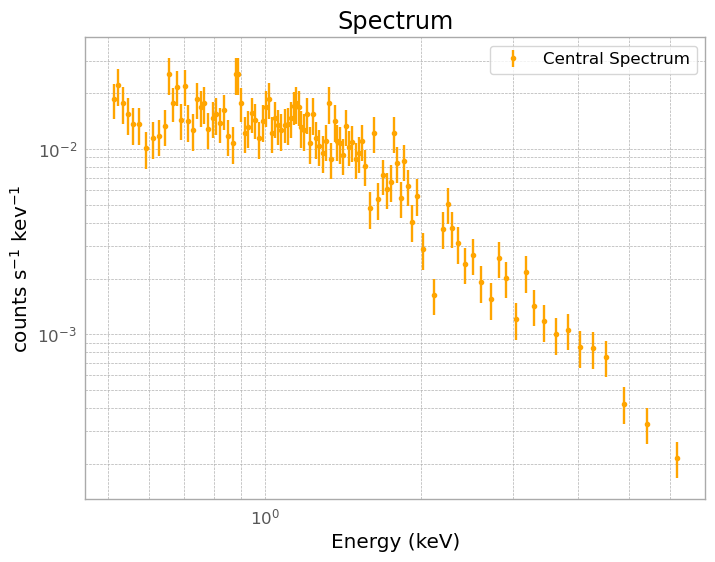

In [19]:
# Plot outside spectrum
Plot.device = '/null'
AllData.clear()
AllModels.clear()

#Plot.device = "/xs"
Plot.xAxis="keV"

AllData.clear()
s1 = Spectrum(binspec)
s1.ignore("**-0.5")
s1.ignore("7.0-**")
Plot.xAxis="keV"
AllData.ignore("bad")
Plot("ldata")
Plot.device = '/null'
energies = Plot.x()      
counts = Plot.y()            
errors = Plot.yErr()       
plt.errorbar(energies, counts, yerr=errors, fmt='o', label="Central Spectrum", color='orange', markersize=3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (keV)")
plt.ylabel("counts s$^{-1}$ kev$^{-1}$")
plt.title("Spectrum")
plt.legend()
plt.grid(True, which="both", linestyle="--", lw=0.5)
plt.show()

## Using galaxy cluster simulations
The second approach will present a SIMPUT tool called `simputmulticell`, specifically designed to provide an interface between SIXTE and 3D data extracted from either toy models or cosmological simulations.

We'll use a 3D dataset saved in a FITS table containing for each point of the grid its position on the sky, temperature, iron abundance and X-ray flux (*xifu_3D_grid.fits*)

We then call `simputmulticell` to construct from this table an optimized SIMPUT catalog that will only contain a limited number of spectra taking advantage of the correlation between the different parameters in a similar way as the `simputmultispec` tool


In [20]:
xcm = 'wabs_vapec_cosmo.xcm'
sim_file = 'xifu_3D.simput'
param_files = "xifu_3D_grid.fits"

comm = (f'simputmulticell ParamFile={param_files} ParamInputNames="T;FE_ABUND" ParamNames="2;14" InputType=TABLE ' + 
        f'XSPECFile={xcm} ParamsLogScale="no;no" ParamsNumValues="100;100" Estep=0.00025 Emin=0.2 Emax=12.0 ' +
        f'Elow=0.2 Eup=12 clobber=yes Simput={sim_file}')
#print(comm)
run_comm(comm, 'Creating simput file for point source')

Creating simput file for point source
simputmulticell ParamFile=xifu_3D_grid.fits ParamInputNames="T;FE_ABUND" ParamNames="2;14" InputType=TABLE XSPECFile=wabs_vapec_cosmo.xcm ParamsLogScale="no;no" ParamsNumValues="100;100" Estep=0.00025 Emin=0.2 Emax=12.0 Elow=0.2 Eup=12 clobber=yes Simput=xifu_3D.simput

		XSPEC version: 12.14.1
	Build Date/Time: Sun Oct 13 18:44:41 2024


!XSPEC12>cosmo 72.,0.,0.76

!XSPEC12>model  wabs*vapec  ;             0.03     -0.001          0          0     100000      1e+06  ;              6.5       0.01     0.0808     0.0808     68.447     68.447  ;              0.3      -0.01          0          0       1000       1000  ;              0.3      -0.01          0          0       1000       1000  ;              0.3      -0.01          0          0       1000       1000  ;              0.3      -0.01          0          0       1000       1000  ;              0.3      -0.01          0          0       1000       1000  ;              0.3      -0.01          0

### Running simulation with `sixtesim` 

In [21]:
RA = 0
Dec = 0
evt_file = 'gal_clusters_sim_evt.fits'
comm = (f'sixtesim XMLFile={xml} RA={RA} Dec={Dec} EvtFile={evt_file} ' +
        f'Simput={sim_file} Exposure=1000 clobber=yes')
#print(comm)
run_comm(comm,'Simulating simput file')

Simulating simput file
sixtesim XMLFile=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/xifu_nofilt_infoc.xml RA=0 Dec=0 EvtFile=gal_clusters_sim_evt.fits Simput=xifu_3D.simput Exposure=1000 clobber=yes
initialize ...
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
Seed = 1976321454
Expected number of pixels in hexagon: 1504
Expected number of pixels in hexagon: 1504
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
try to load all spectra ('xifu_3D.simput[SPECTRUM,1]') into cache ...
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
***SPII_rea

### Creating image with `imgev`

In [22]:
img_file = 'gal_clusters_sim_img.fits'

comm = (f'imgev EvtFile={evt_file} Image={img_file} CoordinateSystem=0 Projection=TAN CUNIT1=deg CUNIT2=deg ' + 
        f'NAXIS1=80 NAXIS2=80 CRVAL1={RA} CRVAL2={Dec} CDELT1=-0.0011888874248538006 CDELT2=0.0011888874248538006 ' + 
        f'CRPIX1=40.5 CRPIX2=40.5 clobber=yes')
#print(comm)
run_comm(comm,'Creating clusters simulation image')

Creating clusters simulation image
imgev EvtFile=gal_clusters_sim_evt.fits Image=gal_clusters_sim_img.fits CoordinateSystem=0 Projection=TAN CUNIT1=deg CUNIT2=deg NAXIS1=80 NAXIS2=80 CRVAL1=0 CRVAL2=0 CDELT1=-0.0011888874248538006 CDELT2=0.0011888874248538006 CRPIX1=40.5 CRPIX2=40.5 clobber=yes
initialize ...
open event file 'gal_clusters_sim_evt.fits' ...
Given file is not a standard Event File, trying to read it as TES Event File...
open TES event file 'gal_clusters_sim_evt.fits' ...
finished successfully!



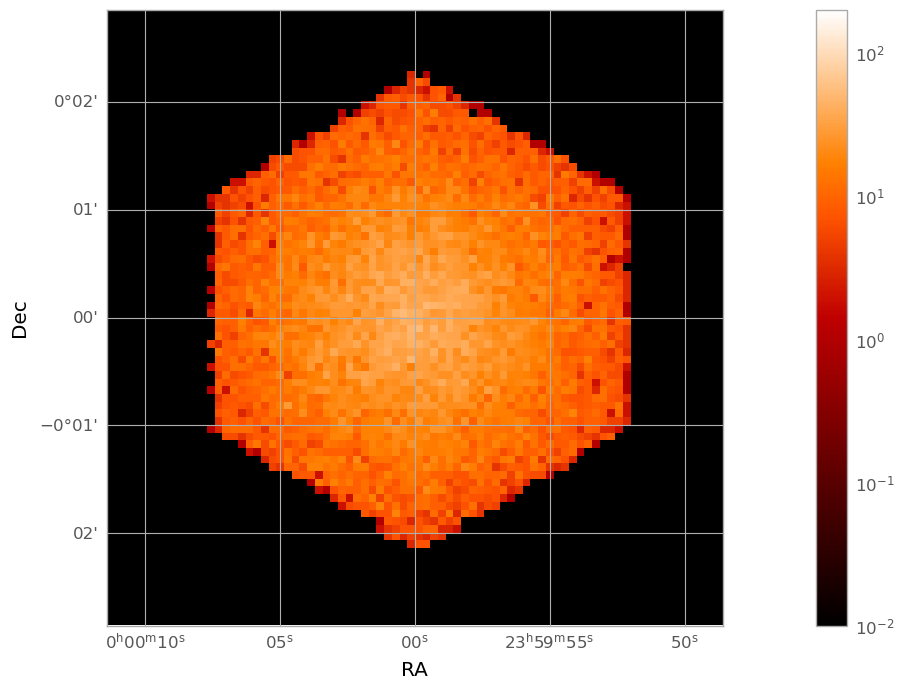

In [23]:
image_data = fits.getdata(img_file, ext=0)
hdu = fits.open(img_file)[0]
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(12,8))

#plot image
ax = fig.add_subplot(1, 1, 1, projection=wcs)
cmap = plt.cm.gist_heat
im = ax.imshow(image_data, cmap=cmap, norm=colors.LogNorm(vmin=0.01, vmax=200, clip=True), origin='lower')
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
fig.colorbar(im,ax=ax, pad=0.1)


To reproduce the spectrum of above a 1Ms simulation should be performed. After that, command sequence should be as always:

### Extract spectrum using only High Resolution Events with `makespec` tool

In [24]:
spec_file = 'gal_clusters_sim_spec.pha'
comm = (f"makespec EvtFile={evt_file} Spectrum={spec_file} EventFilter='GRADING==1' "+
        f"clobber=yes RSPPath={xmldir}")
#print(comm)
run_comm(comm,'Generating spectrum')
# rebin spectral data
binspec = "gal_clusters_sim_spec_rebin.pha"
comm = (f"grppha infile={spec_file} outfile={binspec} clobber=yes comm='group min 20 & exit'")
run_comm(comm, "Rebinning spectrum")

Generating spectrum
makespec EvtFile=gal_clusters_sim_evt.fits Spectrum=gal_clusters_sim_spec.pha EventFilter='GRADING==1' clobber=yes RSPPath=/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline
SIXTE version 3.0.4
***SPII_read_key: Cannot find FILTER keyword - setting it to UNKNOWN
Seed = 2183407776
calculate spectrum ...
store spectrum ...
ARF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf
RMF is 
/Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf

Rebinning spectrum
grppha infile=gal_clusters_sim_spec.pha outfile=gal_clusters_sim_spec_rebin.pha clobber=yes comm='group min 20 & exit'
 
  -------------------------
  MANDATORY KEYWORDS/VALUES
  -------------------------
  --------------------------------------------------------------------
  --------------------------------------------------------------------
  EXTNAME   - SP


1 spectrum  in use
 
Spectral Data File: gal_clusters_sim_spec_rebin.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.682e+01 +/- 1.919e-01
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-1520
  Telescope: Athena Instrument: XIFU  Channel Type: PI
  Exposure Time: 1000 sec
 Using fit statistic: chi
 Using Response (RMF) File            /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_4eV_gaussian.rmf for Source 1
 Using Auxiliary Response (ARF) File  /Users/jessicaplanelles/simput/share/sixte/instruments/athena-xifu/baseline/instdata/athena_xifu_13_rows_no_filter.arf

   167 channels (1-167) ignored in spectrum #     1

    49 channels (1472-1520) ignored in spectrum #     1


ignore:    42 channels ignored from  source number 1


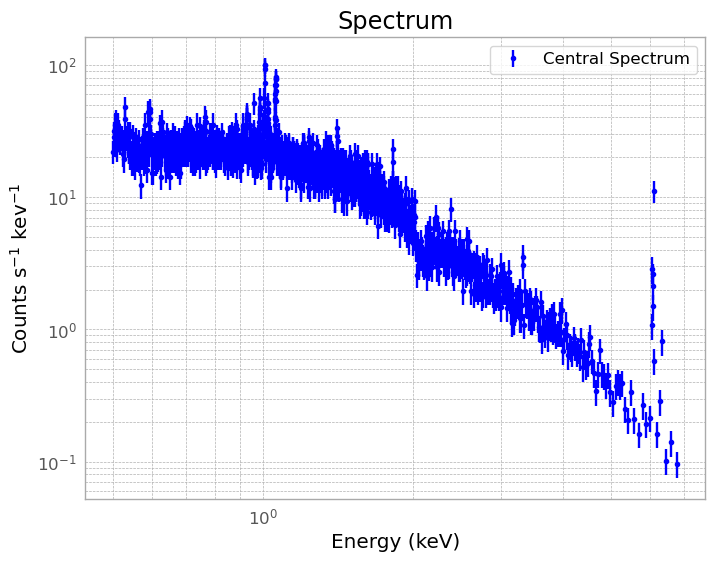

In [25]:
# Plot central spectrum
Plot.device = '/null'
AllData.clear()
AllModels.clear()

#Plot.device = "/xs"
Plot.xAxis="keV"

AllData.clear()
s1 = Spectrum(binspec)
s1.ignore("**-0.5")
s1.ignore("7.0-**")
Plot.xAxis="keV"
AllData.ignore("bad")
Plot("ldata")
Plot.device = '/null'
energies = Plot.x()      
counts = Plot.y()            
errors = Plot.yErr()       
plt.errorbar(energies, counts, yerr=errors, fmt='o', label="Central Spectrum", color='blue', markersize=3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts s$^{-1}$ kev$^{-1}$")
plt.title("Spectrum")
plt.legend()
plt.grid(True, which="both", linestyle="--", lw=0.5)
plt.show()

#### Visualize the geometry defined in the XML file with `xml2svg` (Fig. 24)

In [26]:
# This tool will be implemented in the new version of sixte soon